# Plotting posterior statistics


In [1]:
% Some Paths
if ~exist('sippi_prior','file');
    addpath ../sippi
    addpath ../mgstat
    addpath ../sippi_abc
    sippi_set_path
end
addpath matlab


In [2]:
% Some choices
% Set the HDF5 file with posterior information
f_post_h5 = 'integrate_mockup/PRIOR_tTEM_20230727_20230814_AVG_export_TX07_20230731_2x4_R_POST_Nu100000_aT1.h5'
h5ls(f_post_h5)
% Next step may not be necessary as it is most always done as part of inversion.
integrate_posterior_stats(f_post_h5)
h5ls(f_post_h5)


f_post_h5 = 'integrate_mockup/PRIOR_tTEM_20230727_20230814_AVG_export_TX07_20230731_2x4_R_POST_Nu100000_aT1.h5'

/ - 3 datasets
DATA 01/03: EV [1 6001 ]
DATA 02/03: T [1 6001 ]
DATA 03/03: i_use [400 6001 ]
GROUP 03/01: /M1
/M1 - 3 datasets
DATA 01/03: Mean [101 6001 ]
DATA 02/03: Median [101 6001 ]
DATA 03/03: Std [101 6001 ]
integrate_posterior_stats: post stat for /M1, is_discrete=0
       /M1 +-------------------------------------------- 3.3 200/6001
       /M1 ++------------------------------------------- 6.7 400/6001
       /M1 ++++----------------------------------------- 10.0 600/6001
       /M1 +++++---------------------------------------- 13.3 800/6001
       /M1 +++++++-------------------------------------- 16.7 1000/6001
       /M1 ++++++++------------------------------------- 20.0 1200/6001
       /M1 ++++++++++----------------------------------- 23.3 1400/6001
       /M1 +++++++++++---------------------------------- 26.7 1600/6001
       /M1 +++++++++++++-------------------------------- 30.0 1800/6001
       /M1 ++++++++++++++------------------------------- 33.3 2000/6001
       /M1

In [3]:
## Plot some figures

Invalid text character. Check for unsupported symbol, invisible character, or pasting of non-ASCII characters.

### Temperarture and Evidence

integrate_get_geometry: Reading geometry from tTEM_20230727_20230814_AVG_export.h5


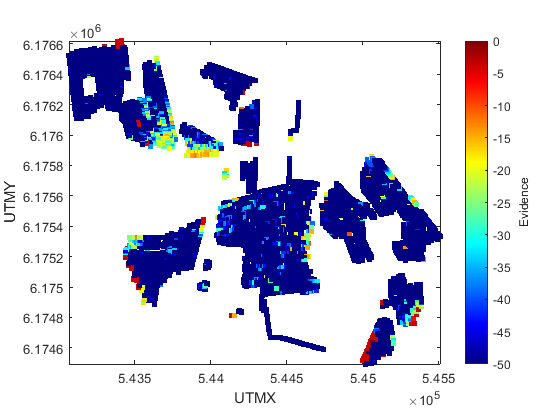

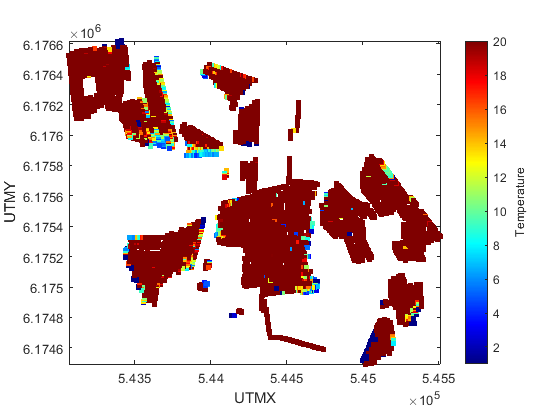

In [4]:
integrate_plot_T_EV(f_post_h5)

### 1D Posterior plot

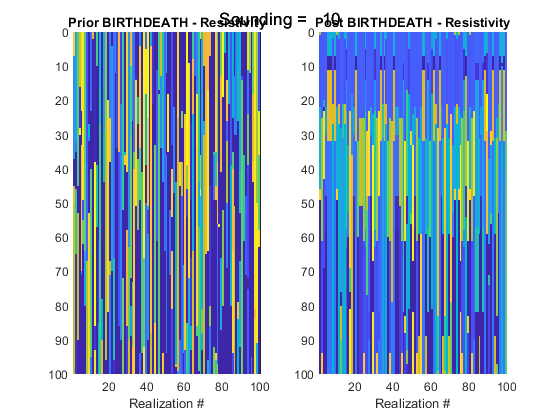

M1


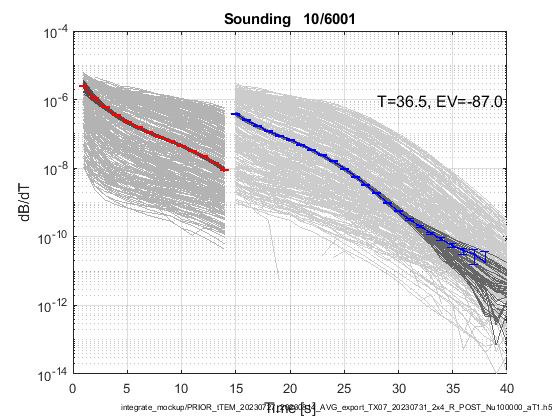

In [5]:
% plot single sounding (number 10)
figure
is=10;
integrate_plot_sounding_model(f_post_h5,is)

% plot data from sounding
figure
integrate_plot_sounding(f_post_h5,is)



### 2D Posterior plots

#### 2D Posterior data

integrate_get_geometry: Reading geometry from tTEM_20230727_20230814_AVG_export.h5


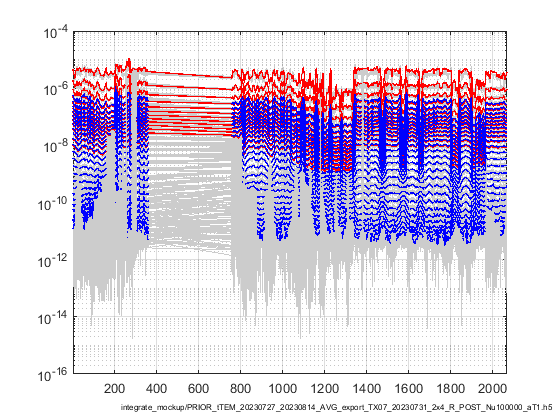

In [6]:
% Select soundings to plot 
[X,Y,ELE,LINE]=integrate_get_geometry(f_data_h5);
use_line = 500;
iplot=find( (LINE<use_line) );

% Plot many data responses
figure
integrate_plot_sounding(f_post_h5,iplot)

#### 2D Profile

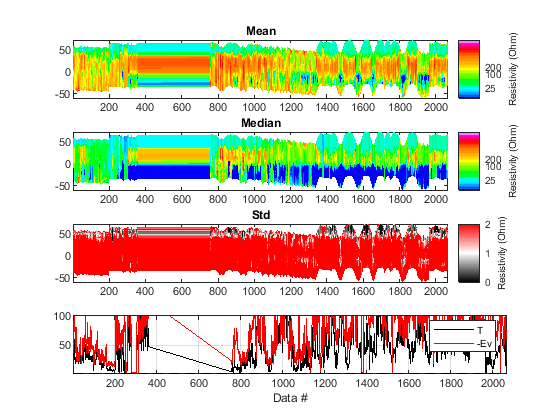

integrate_plot_profile_continuous: Plotting profile of /M1
integrate_get_geometry: Reading geometry from tTEM_20230727_20230814_AVG_export.h5


In [7]:
iplot=find( (LINE>=1900) & (LINE<=1930) );
iplot=find( (LINE<500));
integrate_plot_profile(f_post_h5,iplot);

### 3D Posterior plots

In [ ]:
iplot=find( (LINE>=300) & (LINE<=500) );
figure
integrate_plot_3d_posterior(f_post_h5,'M1','Median',iplot,'doHardcopy',1)
if h5data_exist(f_prior_h5,'/M2')
    figure
    integrate_plot_3d_posterior(f_post_h5,'M2','Mode',iplot)
end
if h5data_exist(f_prior_h5,'/M3')
    figure
    integrate_plot_3d_posterior(f_post_h5,'M3','Mode',iplot)
end
